In [1]:
%matplotlib inline
import pandas
db = pandas.read_csv("presentationuse.csv")
#db.describe
db.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [2]:
#Step 1: Look at Number of Donations:
numDon=db['Number of Donations']
#numDon.describe
doMean=numDon.mean(0)
print("the mean of Donation is",doMean)
doMax=numDon.max(0)
doMin=numDon.min(0)
doStd=numDon.std()
print("the min and max are",doMin,"and",doMax,", and the standard deviation is",doStd)
print("According to the empirical rule, 95% of data should fall in 2std which is between 0 and 16")
doCV=doStd/doMean
print("the Coefficient Variation is",doCV,"which means the data is hugely volatile")

the mean of Donation is 5.427083333333333
the min and max are 1 and 50 , and the standard deviation is 5.740010225714257
According to the empirical rule, 95% of data should fall in 2std which is between 0 and 16
the Coefficient Variation is 1.0576602335289227 which means the data is hugely volatile


In [3]:
numDon.describe()

count    576.000000
mean       5.427083
std        5.740010
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       50.000000
Name: Number of Donations, dtype: float64

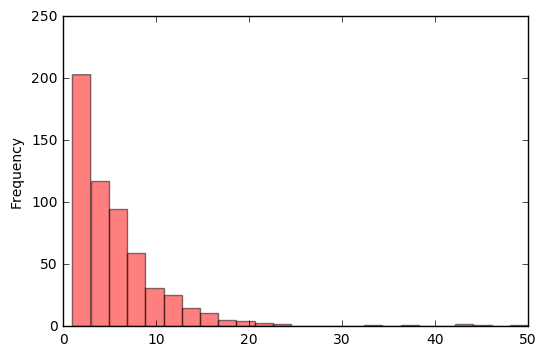

In [4]:
#numDon.diff().hist(color='r',alpha=0.5,bins=20)
numDon.plot.hist(color='r',alpha=0.5,bins=25)

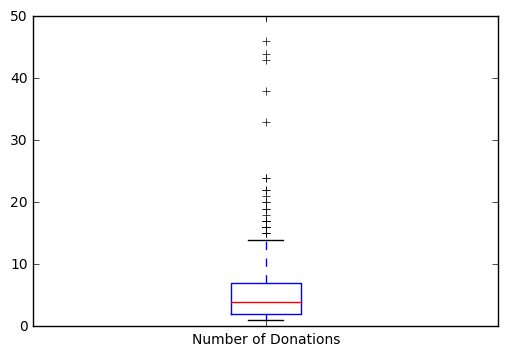

In [5]:
numDon.plot.box()

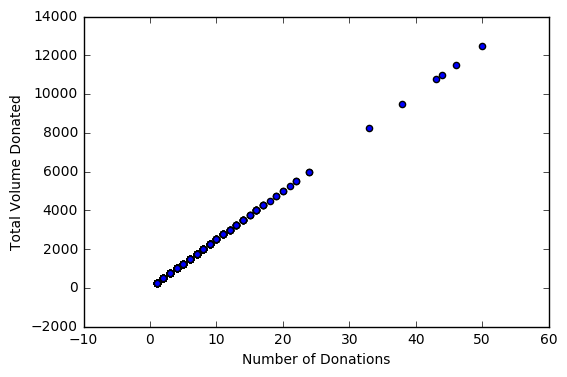

In [6]:
#plotting the relationship between Total Volume Donated and Number of Donations. 
#In fact each donation is 250cc in this case, therefore, delete Total Volume Donated 
db.plot.scatter(x="Number of Donations",y="Total Volume Donated")

In [7]:
db.drop(['Total Volume Donated'],axis=1)
db.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [8]:
#db.describe
#deleting the column Total Volume Donated leaves us with only three useful columns
#Month since Last Donation, Number of Donations, and Month since First Donation
#Adding a new column called 'Month per Donation' 
#=('Month since First Donation'-'Month since Last Donation'+1)/Number of Donations 

In [9]:
db["Donation per Month"] = db['Number of Donations']/(db['Months since First Donation']-db['Months since Last Donation']+1)

In [10]:
db.head()
#however, donation per month isn't exactly accurate, as seen in row 7, 
#the person donated 4 times in a single month but his dpm does not represent his status

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated,Months since First Donation,Made Donation in March 2007,Donation per Month
0,619,2,50,12500,98,1,0.515464
1,664,0,13,3250,28,1,0.448276
2,441,1,16,4000,35,1,0.457143
3,160,2,20,5000,45,1,0.454545
4,358,1,24,6000,77,0,0.311688


count    576.000000
mean       0.497747
std        0.535752
min        0.033333
25%        0.157895
50%        0.269563
75%        1.000000
max        5.000000
Name: Donation per Month, dtype: float64

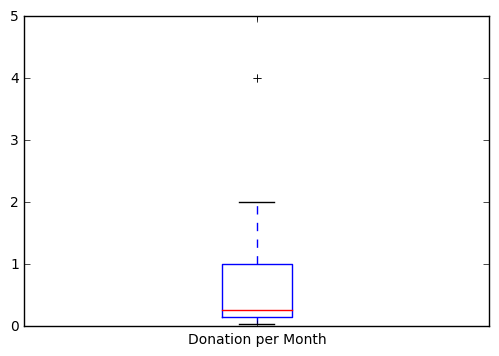

In [11]:
#box plot to show outliers
dPM=db['Donation per Month']
dPM.plot.box()
dPM.describe()

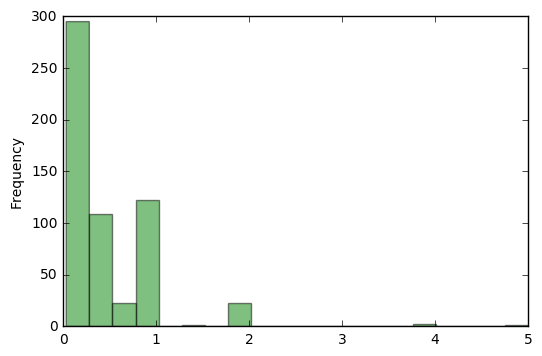

In [12]:
dPM.plot.hist(color='g',alpha=0.5,bins=20)

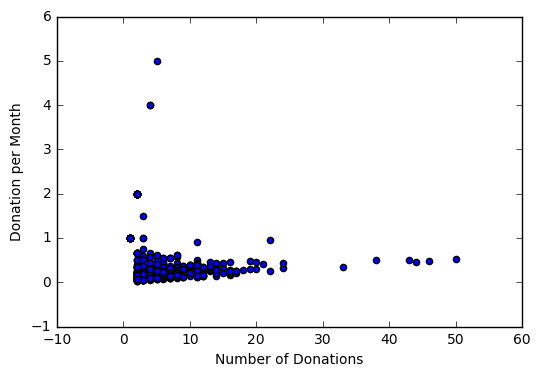

In [13]:
db.plot.scatter(x="Number of Donations",y="Donation per Month")

In [14]:
#linear regression between Donation per Month and Number of Donations
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
A=db['Donation per Month']
B=db['Number of Donations']
lm=smf.ols(formula="A ~ B",data=db).fit()
lm.params

Intercept    0.628318
B           -0.024059
dtype: float64

In [15]:
#lm.summary
B.corr(A)

-0.25776929155451389

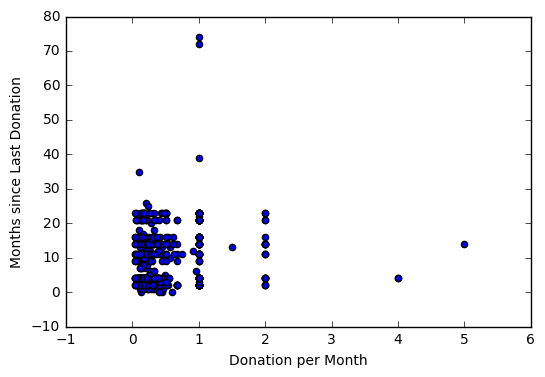

In [18]:
db.plot.scatter(x="Donation per Month",y="Months since Last Donation")

In [17]:
C=db['Months since Last Donation']
B=db['Number of Donations']
lm2=smf.ols(formula="C ~ B",data=db).fit()
lm2.params

Intercept    10.673920
B            -0.227504
dtype: float64